## Markov Random Fields (MRFs) - Edge detection

A Markov Random Field is a model used in the context of undirected graphical models. Instead of a sequence of states like in Markov processes, MRFs consider a set of variables (which can be organized, for instance, in a grid-like structure in image processing). The key property of an MRF is that a variable is conditionally independent of all other variables given its neighbors in the graph.

### Differences with Markov Processes:

- Nature of Model:

    Markov processes usually describe the evolution of a system over time.
    MRFs model dependencies among variables that might not necessarily have a temporal ordering.

- Graph Type:

    Markov processes can be visualized with directed graphs (especially for discrete-time Markov chains).
    MRFs are represented using undirected graphs.

- Dependency:

    In Markov processes, the next state's probability depends only on the current state.
    In MRFs, a variable's probability distribution might depend on the states of its neighbors.

### Application:

**Edge Detection:** The boundaries and transitions in an image can be detected using Markov processes by modeling the dependencies between pixels.

In [16]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [17]:
# Load an image using Pillow and convert to grayscale
image = Image.open("lena_color.png").convert("L")
image = np.array(image)

In [18]:
laplacian = cv2.Laplacian(image, cv2.CV_64F)

In [19]:
# Perform edge detection using Canny filter
edges_canny = cv2.Canny(image, 100, 200)

### Markov Random Field Edge Detection Algorithm

Implement the following algorithm 

**Input:**
- `img`: Grayscale image of dimensions H x W
- `percentile`: Percentile for dynamic thresholding (default: 90)
- `extended_neighborhood`: Boolean indicating if diagonal neighbors should be considered (default: True)
- `gradient_weight`: Weight for the gradient term in the energy calculation (default: 0.5)

**Output:**
- `edges`: Binary image indicating detected edges

**Procedure:**

1. Initialize `energy` matrix of size H x W with zeros.
2. Define a helper function `gradient`:
    - Input: `img`, `i`, `j`
    - Computes x-gradient as difference between `img[i+1, j]` and `img[i, j]`.
    - Computes y-gradient as difference between `img[i, j+1]` and `img[i, j]`.
    - Returns the magnitude of the gradient.
3. For each pixel `(i, j)` in `img`:
    - Calculate `basic_energy` as the sum of absolute differences between current pixel and its right and bottom neighbors.
    - If `extended_neighborhood` is True, add to `basic_energy` the sum of absolute differences between current pixel and its main diagonal neighbors (upper left and bottom right corners).
    - Calculate `grad_energy` using the `gradient` function.
    - Compute `combined_energy` as a weighted sum of `basic_energy` and `grad_energy` using the `gradient_weight` variable as the weight for the gradient.
    - Set `energy[i, j]` to `combined_energy`.
4. Compute the threshold as the `percentile` of all values in `energy`.
5. Threshold `energy` to create the `edges` image: pixels in `energy` greater than the threshold are set to 255 (white) and others are set to 0 (black).
6. Return `edges`.

In [ ]:
def gradiant(img, i, j):
    dx = img[i, j] - img[i + 1, j]
    dy = img[i, j] - img[i, j + 1]
    return np.sqrt(dx**2 + dy**2)


def mrf_edge_detection(
    image, percentile=91, extended_neighborhood=True, gradient_weight=0.5
):
    img = np.float64(image[:])
    energy = np.zeros_like(img)
    H, W = img.shape

    for i in range(H - 1):
        for j in range(W - 1):
            dx = img[i, j] - img[i + 1, j]
            dy = img[i, j] - img[i, j + 1]
            basic_energy = np.abs(dx) + np.abs(dy)

            if extended_neighborhood:
                if i != 0 and j != 0:
                    dx = img[i, j] - img[i - 1, j - 1]
                    dy = img[i, j] - img[i + 1, j + 1]
                    basic_energy += np.abs(dx) + np.abs(dy)

            grad_energy = gradiant(img, i, j)
            combined_energy = (
                basic_energy * (1 - gradient_weight) + grad_energy * gradient_weight
            )
            energy[i, j] = combined_energy

    threshold = np.percentile(energy, percentile)
    edges = energy > threshold

    return edges

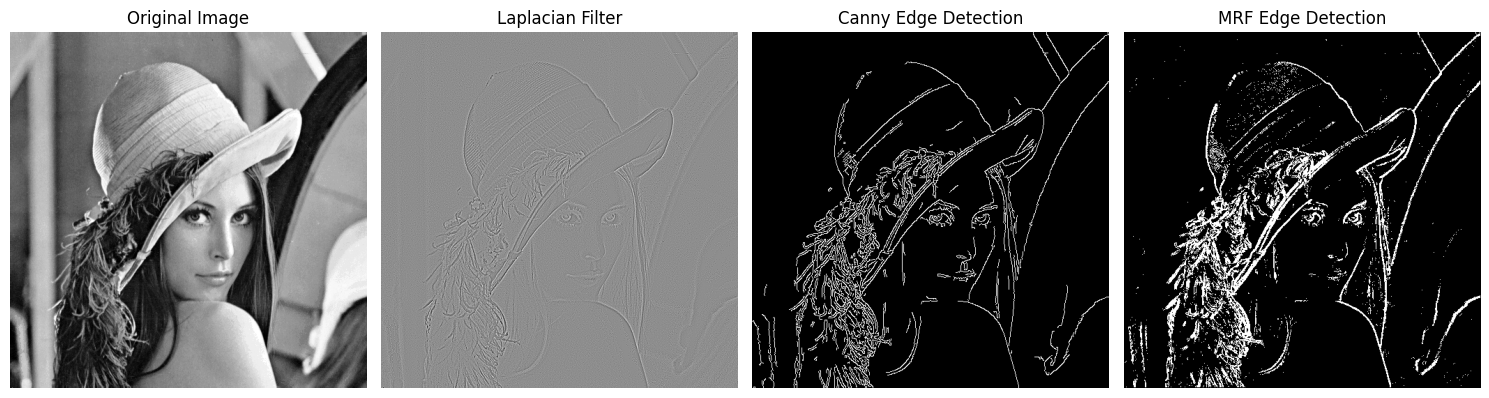

In [23]:
edges_mrf = mrf_edge_detection(image)

# Display images
fig, axarr = plt.subplots(1, 4, figsize=(15, 15))

axarr[0].imshow(image, cmap="gray")
axarr[0].set_title("Original Image")
axarr[0].axis("off")

axarr[1].imshow(laplacian, cmap="gray")
axarr[1].set_title("Laplacian Filter")
axarr[1].axis("off")

axarr[2].imshow(edges_canny, cmap="gray")
axarr[2].set_title("Canny Edge Detection")
axarr[2].axis("off")

axarr[3].imshow(edges_mrf, cmap="gray")
axarr[3].set_title("MRF Edge Detection")
axarr[3].axis("off")

plt.tight_layout()
plt.show()

### Question:

Comment about the visual differences of the edge detection algorithms implemented above. Modify the percentil in the `mrf_edge_detection` function and describe its impact in the output image.

Answer: We can see that adjusting the percentile in the MRF edge detection algorithm significantly affects the sensitivity of edge detection. A lower percentile value results in a lower threshold, which means more pixels are classified as edges, leading to a denser and potentially noisier edge map. Conversely, a higher percentile value raises the threshold, resulting in fewer detected edges, which can help in highlighting only the most prominent features in the image while suppressing noise.